In [2]:
library(Seurat)
library(Matrix)
library(ggplot2)
library(cowplot)
library(dplyr)
library(enrichR)
load('/data/komura//project//scRNA-seq_gastric_cancer//notebooks/Normal_Total_gastric.RData')
load("Normal_Total_gastric_all_markers.RData")


Attaching package: ‘cowplot’

The following object is masked from ‘package:ggplot2’:

    ggsave


Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



In [3]:
# geneの発現量の平均値をとる
AddGeneSetScore <- function(data.integrated, genes){
    sum.exp <- rowSums(FetchData(object = data.integrated,
                                   vars = genes),
                          na.rm = TRUE)

    if (all(names(x = sum.exp) == rownames(x = data.integrated@meta.data))) {
      cat("Cell names order match in 'mean.exp' and 'object@meta.data':\n", 
          "adding gene set mean expression values in 'object@meta.data$gene.set.score'")
      return (sum.exp)
    }
}

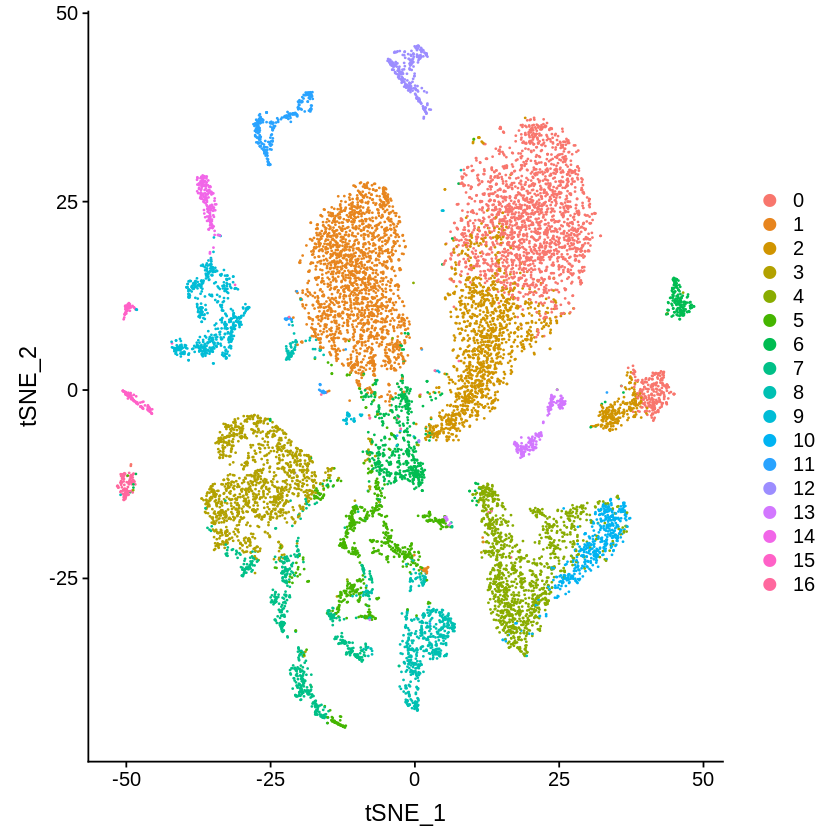

In [4]:
# switch to integrated assay. The variable features of this assay are
# automatically set during IntegrateData
DefaultAssay(object = data.integrated) <- "integrated"

# Run the standard workflow for visualization and clustering
data.integrated <- ScaleData(object = data.integrated, verbose = FALSE)
data.integrated <- RunPCA(object = data.integrated, npcs = 30, verbose = FALSE)
data.integrated <- RunTSNE(object = data.integrated, reduction = "pca", 
    dims = 1:30)
p1 <- DimPlot(object = data.integrated)
plot(p1)

In [5]:
data.integrated

An object of class Seurat 
18697 features across 13172 samples within 2 assays 
Active assay: integrated (2000 features)
 1 other assay present: RNA
 2 dimensional reductions calculated: pca, tsne

In [9]:
stomach <- subset(x= data.integrated, idents=c(3,5,7,13))

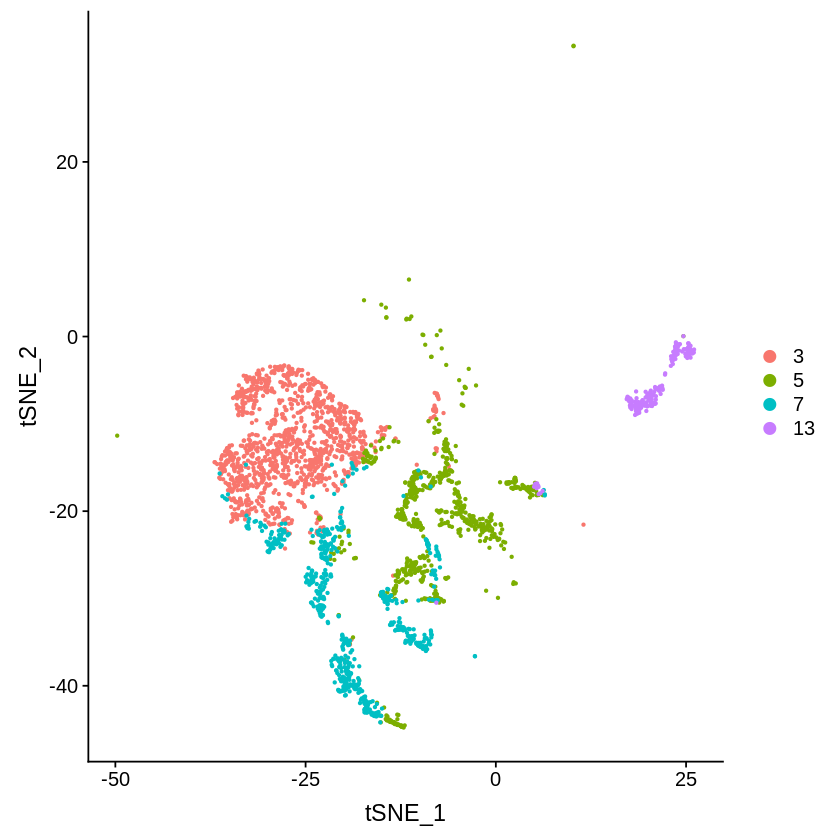

In [10]:
p2 <- DimPlot(object = stomach)
plot(p2)

In [8]:
stomach.markers <- FindAllMarkers(object = stomach, only.pos = TRUE, min.pct = 0.25, logfc.threshold = 0.25)

Calculating cluster 3
Calculating cluster 5
Calculating cluster 7
Calculating cluster 13


In [9]:
stomach.markers %>% group_by(cluster) %>% top_n(n=5, wt= avg_logFC) -> stomach_top5

In [10]:
stomach_top5

p_val,avg_logFC,pct.1,pct.2,p_val_adj,cluster,gene
0.000000e+00,2.8671534,0.975,0.484,0.000000e+00,3,GKN1
0.000000e+00,2.0351692,0.979,0.635,0.000000e+00,3,TFF1
3.450959e-267,1.5222491,0.955,0.405,6.901918e-264,3,MUC5AC
1.830769e-266,1.8393388,0.919,0.383,3.661537e-263,3,GKN2
3.831122e-216,1.5124181,0.904,0.471,7.662244e-213,3,S100P
6.225892e-135,1.5784176,0.825,0.417,1.245178e-131,5,CHGA
4.629203e-30,0.9904037,0.573,0.285,9.258406e-27,5,REG1A
5.868289e-22,1.1328395,0.477,0.219,1.173658e-18,5,PRAP1
3.206770e-08,0.9671542,0.825,0.886,6.413540e-05,5,PGA4
5.408304e-06,1.3840259,0.851,0.863,1.081661e-02,5,PGA5


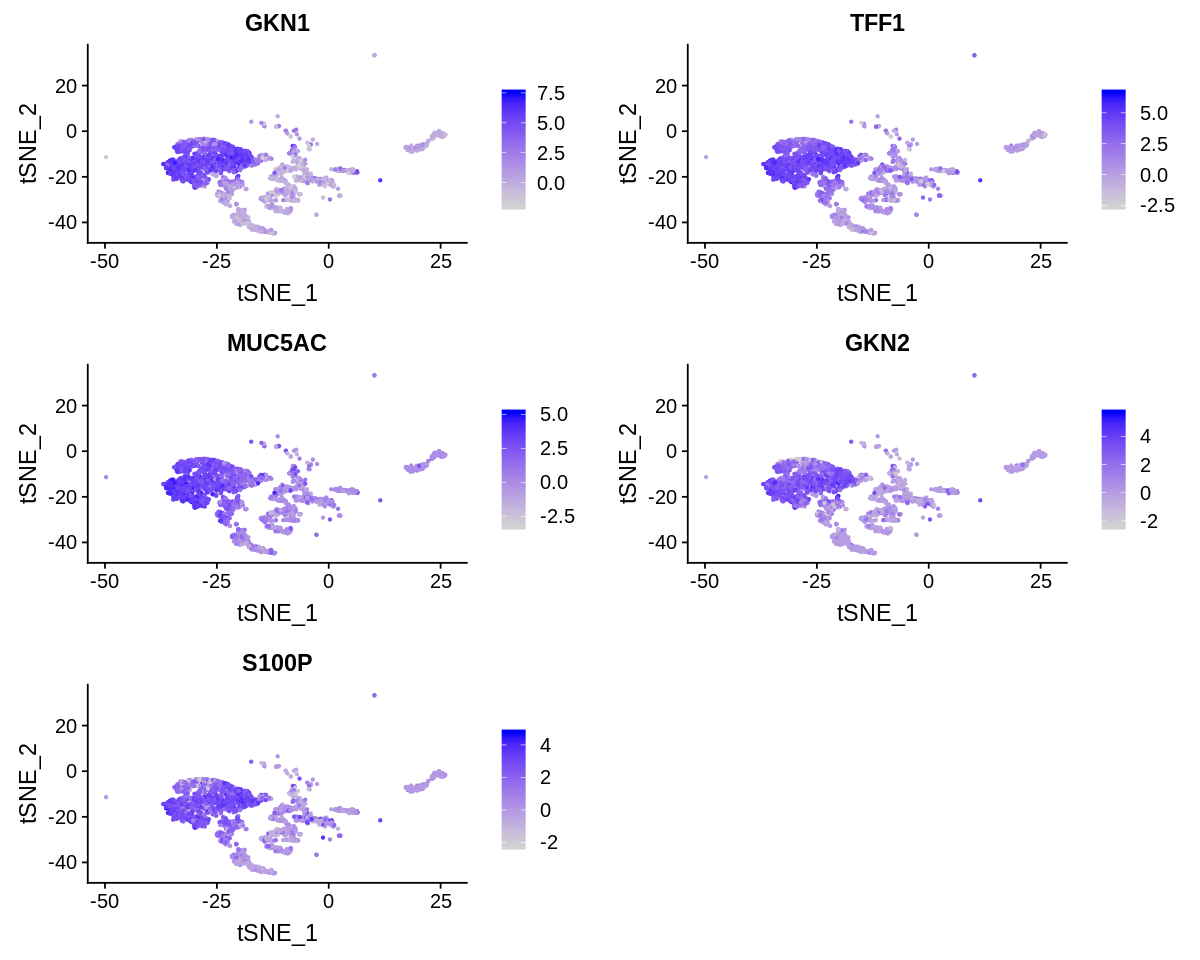

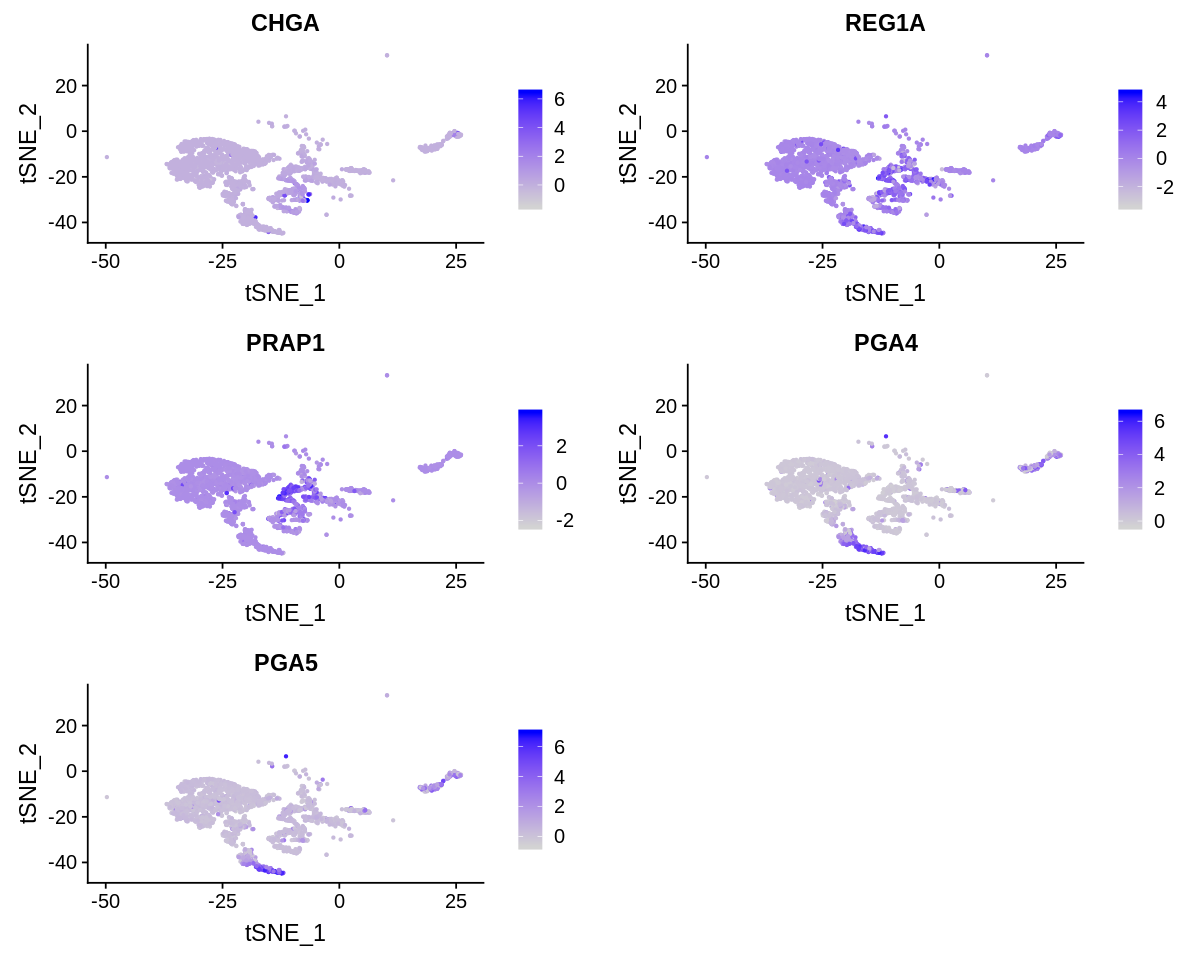

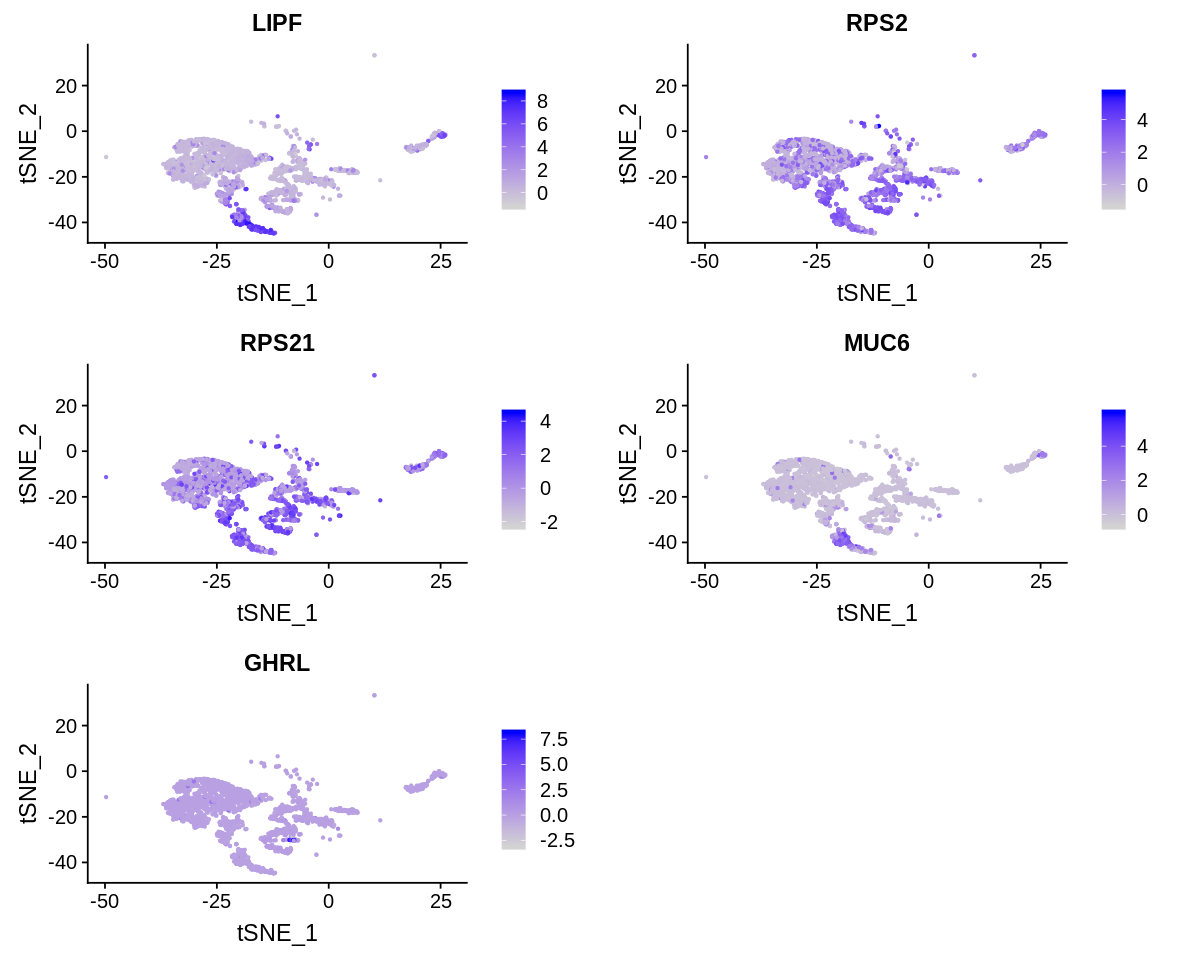

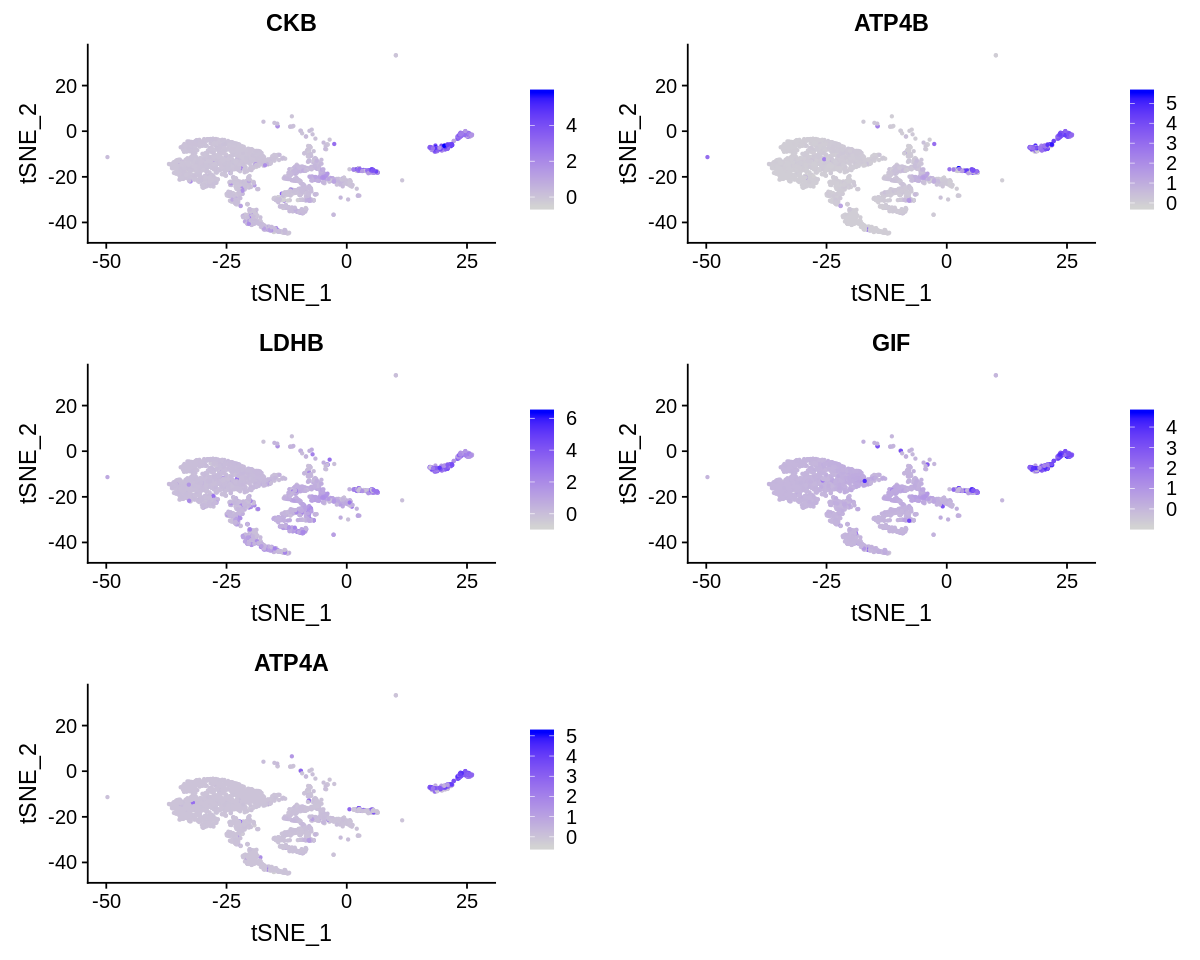

In [25]:
for (i in 0:3){
    options(repr.plot.width=10, repr.plot.height=8)
    p3 <- FeaturePlot(object = stomach, features = stomach_top5$gene[(5*i+1):(5*i+5)],ncol=2)
    plot(p3) 
}

In [28]:
stomach.3<- FindMarkers(object = stomach, ident.1 = 3, ident.2 = NULL, only.pos=TRUE,min.pct = 0.25, logfc.threshold = 0.25)

In [45]:
stomach.5<- FindMarkers(object = stomach, ident.1 = 5, ident.2 = NULL, only.pos=TRUE,min.pct = 0.25, logfc.threshold = 0.25)

In [46]:
stomach.7<- FindMarkers(object = stomach, ident.1 = 7, ident.2 = NULL, only.pos=TRUE,min.pct = 0.25, logfc.threshold = 0.25)

In [47]:
stomach.13<- FindMarkers(object = stomach, ident.1 = 13, ident.2 = NULL, only.pos=TRUE,min.pct = 0.25, logfc.threshold = 0.25)

In [30]:
dim(stomach.3)

[1] 194   5

In [31]:
head(stomach.markers)

,p_val,avg_logFC,pct.1,pct.2,p_val_adj,cluster,gene
GKN1,0.000000e+00,2.867153,0.975,0.484,0.000000e+00,3,GKN1
TFF1,0.000000e+00,2.035169,0.979,0.635,0.000000e+00,3,TFF1
MUC5AC,3.450959e-267,1.522249,0.955,0.405,6.901918e-264,3,MUC5AC
GKN2,1.830769e-266,1.839339,0.919,0.383,3.661537e-263,3,GKN2
TFF2,3.624097e-228,1.478759,0.934,0.554,7.248195e-225,3,TFF2
S100P,3.831122e-216,1.512418,0.904,0.471,7.662244e-213,3,S100P


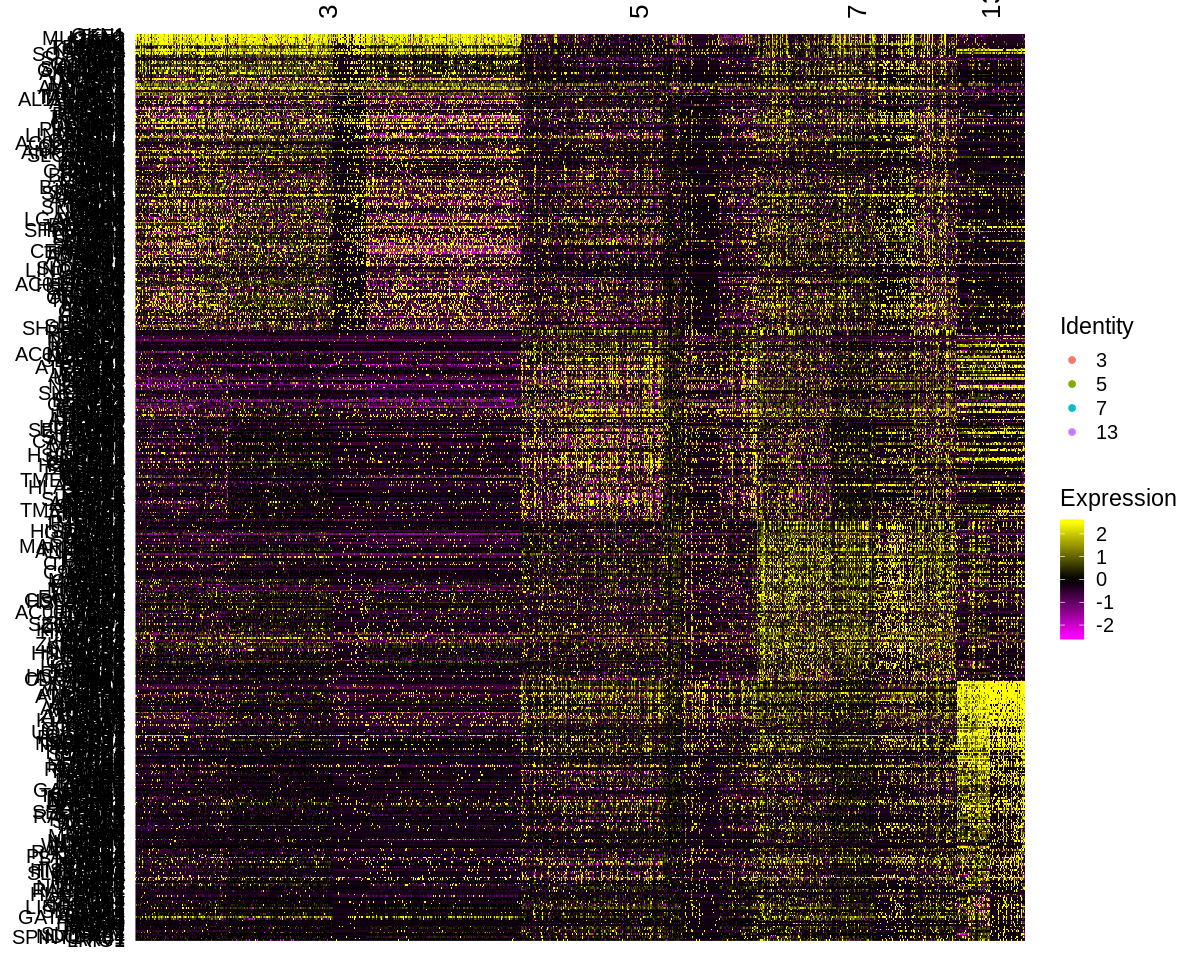

In [101]:
DoHeatmap(stomach, features=c(rownames(stomach.3),rownames(stomach.5), rownames(stomach.7),rownames(stomach.13)),angle=90)

In [53]:
dim(stomach.3)

[1] 194   5

In [72]:
gene.3 <- rownames(stomach.3[stomach.3[5]<0.01,])

In [73]:
gene.5 <- rownames(stomach.5[stomach.5[5]<0.01,])

In [74]:
gene.7 <- rownames(stomach.7[stomach.7[5]<0.01,])

In [75]:
gene.13 <- rownames(stomach.13[stomach.13[5]<0.01,])

In [97]:
length(gene.3)
length(gene.5)
length(gene.7)
length(gene.13)

[1] 133

[1] 78

[1] 124

[1] 183

In [76]:
dbs <- c("GO_Molecular_Function_2018", "GO_Cellular_Component_2018", "GO_Biological_Process_2018")

In [78]:
enriched.3 <- enrichr(gene.3,dbs)
enriched.5 <- enrichr(gene.5,dbs)
enriched.7 <- enrichr(gene.7,dbs)
enriched.13 <- enrichr(gene.13,dbs)

Uploading data to Enrichr... Done.
  Querying GO_Molecular_Function_2018... Done.
  Querying GO_Cellular_Component_2018... Done.
  Querying GO_Biological_Process_2018... Done.
Parsing results... Done.
Uploading data to Enrichr... Done.
  Querying GO_Molecular_Function_2018... Done.
  Querying GO_Cellular_Component_2018... Done.
  Querying GO_Biological_Process_2018... Done.
Parsing results... Done.
Uploading data to Enrichr... Done.
  Querying GO_Molecular_Function_2018... Done.
  Querying GO_Cellular_Component_2018... Done.
  Querying GO_Biological_Process_2018... Done.
Parsing results... Done.


In [83]:
print("Biological_Process_2018")
enriched.3$GO_Biological_Process_2018[enriched.3$GO_Biological_Process_2018$Adjusted.P.value < 0.05,][c(1,2,4,9)]


print("Cellular_Component_2018")
enriched.3$GO_Cellular_Component_2018[enriched.3$GO_Cellular_Component$Adjusted.P.value < 0.05,][c(1,2,4,9)]


print('Molecular_Function_2018')
enriched.3$GO_Molecular_Function_2018[enriched.3$GO_Molecular_Function_2018$Adjusted.P.value < 0.05,][c(1,2,4,9)]

[1] "Biological_Process_2018"


,Term,Overlap,Adjusted.P.value,Genes
1,doxorubicin metabolic process (GO:0044598),3/9,0.0027181047,AKR1B10;AKR1C1;AKR1C3
2,daunorubicin metabolic process (GO:0044597),3/9,0.0027181047,AKR1B10;AKR1C1;AKR1C3
3,glycoside metabolic process (GO:0016137),4/15,0.0012570134,AKR1B10;FUCA1;AKR1C1;AKR1C3
4,aminoglycoside antibiotic metabolic process (GO:0030647),3/9,0.0027181047,AKR1B10;AKR1C1;AKR1C3
5,retina homeostasis (GO:0001895),5/39,0.0015098196,IGKC;ZG16B;IGHA1;LYZ;JCHAIN
6,prostanoid metabolic process (GO:0006692),3/13,0.0051050867,HPGD;AKR1C1;AKR1C3
7,progesterone metabolic process (GO:0042448),3/12,0.0042092590,DHRS9;AKR1C1;AKR1C3
8,quinone metabolic process (GO:1901661),3/11,0.0036604342,AKR1B10;AKR1C1;AKR1C3
9,positive regulation of respiratory burst (GO:0060267),2/9,0.0436598904,IGHA1;JCHAIN
10,epithelium development (GO:0060429),7/116,0.0021785649,CBR1;TAGLN;ELF3;DHRS9;AKR1C1;CDHR2;VEGFA


[1] "Cellular_Component_2018"


Term,Overlap,Adjusted.P.value,Genes
mitochondrial respiratory chain complex IV (GO:0005751),3/18,0.01962587,C15ORF48;MT-CO1;MT-CO3


[1] "Molecular_Function_2018"


,Term,Overlap,Adjusted.P.value,Genes
1,immunoglobulin receptor binding (GO:0034987),6/82,0.001100052,IGHG4;IGHG1;IGKC;IGLC2;IGHA1;JCHAIN
2,aldo-keto reductase (NADP) activity (GO:0004033),4/21,0.001100052,ALDH3A1;AKR1B10;AKR1C1;AKR1C3
3,alditol:NADP+ 1-oxidoreductase activity (GO:0004032),3/13,0.002707423,AKR1B10;AKR1C1;AKR1C3
4,ketosteroid monooxygenase activity (GO:0047086),2/7,0.016787442,AKR1C1;AKR1C3
5,alcohol dehydrogenase (NADP+) activity (GO:0008106),4/21,0.001100052,ALDH3A1;AKR1B10;AKR1C1;AKR1C3
6,"UDP-galactose:beta-N-acetylglucosamine beta-1,3-galactosyltransferase activity (GO:0008499)",3/13,0.002707423,B3GNT7;B3GNT5;B3GALT5
7,"beta-1,3-galactosyltransferase activity (GO:0048531)",3/15,0.003732305,B3GNT7;B3GNT5;B3GALT5
8,"oxidoreductase activity, acting on NAD(P)H, quinone or similar compound as acceptor (GO:0016655)",3/16,0.004063365,CBR1;AKR1C1;AKR1C3
9,bile acid binding (GO:0032052),2/9,0.024605023,AKR1C1;AKR1C3
10,"oxidoreductase activity, acting on the CH-OH group of donors, NAD or NADP as acceptor (GO:0016616)",6/89,0.001381963,CBR1;AKR1B10;DHRS9;HPGD;AKR1C1;AKR1C3


In [84]:
print("Biological_Process_2018")
enriched.5$GO_Biological_Process_2018[enriched.5$GO_Biological_Process_2018$Adjusted.P.value < 0.05,][c(1,2,4,9)]


print("Cellular_Component_2018")
enriched.5$GO_Cellular_Component_2018[enriched.5$GO_Cellular_Component$Adjusted.P.value < 0.05,][c(1,2,4,9)]


print('Molecular_Function_2018')
enriched.5$GO_Molecular_Function_2018[enriched.5$GO_Molecular_Function_2018$Adjusted.P.value < 0.05,][c(1,2,4,9)]

[1] "Biological_Process_2018"


,Term,Overlap,Adjusted.P.value,Genes
1,mitochondrial ATP synthesis coupled electron transport (GO:0042775),9/86,1.810890e-08,COX7B;NDUFB6;NDUFB3;NDUFA1;CYCS;NDUFC2;COX6C;COX7C;UQCRH
2,respiratory electron transport chain (GO:0022904),10/95,2.682340e-09,COX7B;NDUFB6;NDUFB3;NDUFA1;CYCS;NDUFC2;COX6C;SDHB;COX7C;UQCRH
3,"mitochondrial electron transport, cytochrome c to oxygen (GO:0006123)",4/22,3.824558e-04,COX7B;CYCS;COX6C;COX7C
4,positive regulation of cardiac muscle contraction (GO:0060452),2/7,2.005668e-02,CHGA;RGS2
5,"mitochondrial electron transport, NADH to ubiquinone (GO:0006120)",4/47,6.495712e-03,NDUFB6;NDUFB3;NDUFA1;NDUFC2
6,positive regulation of striated muscle contraction (GO:0045989),2/8,2.133967e-02,CHGA;RGS2
7,positive regulation of hydrolase activity (GO:0051345),6/173,7.590988e-03,CCL20;RGS1;RPS3;PFN1;CALM1;S100A10
8,protein alkylation (GO:0008213),3/30,1.660019e-02,EEF1A1;RPS2;CALM1
9,relaxation of cardiac muscle (GO:0055119),2/12,3.788619e-02,CHGA;RGS2
10,regulation of cardiac muscle contraction (GO:0055117),3/36,2.133967e-02,CHGA;RGS2;CALM1


[1] "Cellular_Component_2018"


,Term,Overlap,Adjusted.P.value,Genes
1,mitochondrial inner membrane (GO:0005743),13/342,7.186158e-08,COX7B;NDUFB6;NDUFB3;NDUFA1;NDUFC2;MRPL12;COX6C;SDHB;COX7C;UQCRH;RPS3;CYCS;SLC25A5
2,mitochondrion (GO:0005739),19/1027,5.237213e-07,COX7B;OAT;NDUFB6;MAOB;NDUFA1;NDUFC2;MRPL12;COX6C;SDHB;COX7C;UQCRH;SOD1;C1QBP;MPC2;FDX1;CYCS;SLC25A5;DECR1;PCK2
3,multivesicular body lumen (GO:0097486),2/8,1.076646e-02,PGA3;PGA4
4,late endosome lumen (GO:0031906),2/10,1.377266e-02,PGA3;PGA4
5,mitochondrial respiratory chain complex I (GO:0005747),4/52,1.742706e-03,NDUFB6;NDUFB3;NDUFA1;NDUFC2
6,mitochondrial envelope (GO:0005740),3/70,3.846443e-02,MAOB;CYCS;SOD1
13,mitochondrial matrix (GO:0005759),6/309,2.270088e-02,OAT;FDX1;RPS3;DECR1;PCK2;SOD1


[1] "Molecular_Function_2018"


,Term,Overlap,Adjusted.P.value,Genes
2,NADH dehydrogenase (ubiquinone) activity (GO:0008137),4/44,0.002129337,NDUFB6;NDUFB3;NDUFA1;NDUFC2
3,NADH dehydrogenase (quinone) activity (GO:0050136),4/44,0.002129337,NDUFB6;NDUFB3;NDUFA1;NDUFC2


In [85]:
print("Biological_Process_2018")
enriched.7$GO_Biological_Process_2018[enriched.7$GO_Biological_Process_2018$Adjusted.P.value < 0.05,][c(1,2,4,9)]


print("Cellular_Component_2018")
enriched.7$GO_Cellular_Component_2018[enriched.7$GO_Cellular_Component$Adjusted.P.value < 0.05,][c(1,2,4,9)]


print('Molecular_Function_2018')
enriched.7$GO_Molecular_Function_2018[enriched.7$GO_Molecular_Function_2018$Adjusted.P.value < 0.05,][c(1,2,4,9)]

[1] "Biological_Process_2018"


,Term,Overlap,Adjusted.P.value,Genes
1,cellular response to zinc ion (GO:0071294),6/20,2.141053e-06,MT2A;MT1M;MT1F;MT1G;MT1X;MT1E
2,response to copper ion (GO:0046688),6/26,4.316018e-06,MT2A;MT1M;MT1F;MT1G;MT1X;MT1E
3,response to zinc ion (GO:0010043),6/33,7.514981e-06,MT2A;MT1M;MT1F;MT1G;MT1X;MT1E
4,cellular response to cadmium ion (GO:0071276),6/30,7.062664e-06,MT2A;MT1M;MT1F;MT1G;MT1X;MT1E
5,zinc ion homeostasis (GO:0055069),6/32,7.062664e-06,MT2A;MT1M;MT1F;MT1G;MT1X;MT1E
6,cellular response to copper ion (GO:0071280),6/22,2.141053e-06,MT2A;MT1M;MT1F;MT1G;MT1X;MT1E
7,cellular zinc ion homeostasis (GO:0006882),6/32,7.062664e-06,MT2A;MT1M;MT1F;MT1G;MT1X;MT1E
8,response to cadmium ion (GO:0046686),6/32,7.062664e-06,MT2A;MT1M;MT1F;MT1G;MT1X;MT1E
9,DNA topological change (GO:0006265),3/10,1.874536e-03,TOP2A;HMGB2;HMGB1
10,DNA ligation (GO:0006266),4/19,5.713189e-04,TOP2A;PCNA;HMGB2;HMGB1


[1] "Cellular_Component_2018"


,Term,Overlap,Adjusted.P.value,Genes
1,perinuclear region of cytoplasm (GO:0048471),12/379,3.135375e-04,APP;MT2A;MT1M;MCM3;HMGB2;MT1F;PCLAF;MT1G;MT1X;CLU;YBX3;MT1E
2,secretory granule lumen (GO:0034774),13/318,1.348445e-05,APP;HSP90AA1;SERPINB1;HSP90AB1;TUBB;HMGB1;PA2G4;LYZ;CLU;EEF1A1;FABP5;GHRL;PPIA
3,multivesicular body lumen (GO:0097486),2/8,1.553007e-02,PGA3;PGA4
4,nuclear heterochromatin (GO:0005720),3/21,6.985589e-03,CBX5;H2AFZ;CBX3
5,late endosome lumen (GO:0031906),2/10,2.034705e-02,PGA3;PGA4
6,cytoplasmic vesicle lumen (GO:0060205),7/130,8.180811e-04,EEF1A1;HSP90AA1;SERPINB1;HSP90AB1;GHRL;HMGB1;PPIA
7,U4 snRNP (GO:0005687),2/13,2.322765e-02,SNRPD1;SNRPF
8,vacuolar lumen (GO:0005775),6/162,1.098719e-02,CD74;HSP90AA1;FABP5;TUBB;PA2G4;LYZ
9,pericentric heterochromatin (GO:0005721),2/13,2.322765e-02,CBX5;CBX3
10,methylosome (GO:0034709),2/13,2.322765e-02,SNRPD1;SNRPF


[1] "Molecular_Function_2018"


,Term,Overlap,Adjusted.P.value,Genes
1,DNA polymerase binding (GO:0070182),4/17,2.549176e-04,HSP90AA1;PCNA;HSP90AB1;HMGB1
2,RNA binding (GO:0003723),29/1388,1.206808e-06,TOP2A;HSP90AB1;RPLP0;HMGB2;DDX21;YBX1;HMGB1;YBX3;HSPD1;TUBA1B;SNRPD1;FAM120A;KIAA1324;RPS3;SOX9;RPS2;HMGN2;DUT;HSP90AA1;SORBS2;PA2G4;HNRNPAB;EEF1A1;SNRPF;PFN1;RPS21;PPIA;RAN;METAP2
3,histone methyltransferase binding (GO:1990226),2/7,1.227266e-02,HSP90AB1;CBX3
4,aspartic-type peptidase activity (GO:0070001),3/18,6.155800e-03,PGA3;PGC;PGA4
5,MHC class II protein complex binding (GO:0023026),3/17,6.155800e-03,CD74;HSP90AA1;HSP90AB1
6,aspartic-type endopeptidase activity (GO:0004190),3/22,7.986314e-03,PGA3;PGC;PGA4
7,RAGE receptor binding (GO:0050786),2/10,2.242328e-02,HMGB2;HMGB1
8,MHC protein complex binding (GO:0023023),3/20,6.628577e-03,CD74;HSP90AA1;HSP90AB1
9,"DNA binding, bending (GO:0008301)",3/18,6.155800e-03,TOP2A;HMGB2;HMGB1
10,enhancer binding (GO:0035326),3/27,1.059259e-02,HMGB2;HMGA1;SOX9


In [86]:
print("Biological_Process_2018")
enriched.13$GO_Biological_Process_2018[enriched.13$GO_Biological_Process_2018$Adjusted.P.value < 0.05,][c(1,2,4,9)]


print("Cellular_Component_2018")
enriched.13$GO_Cellular_Component_2018[enriched.13$GO_Cellular_Component$Adjusted.P.value < 0.05,][c(1,2,4,9)]


print('Molecular_Function_2018')
enriched.13$GO_Molecular_Function_2018[enriched.13$GO_Molecular_Function_2018$Adjusted.P.value < 0.05,][c(1,2,4,9)]

[1] "Biological_Process_2018"


,Term,Overlap,Adjusted.P.value,Genes
1,mitochondrial ATP synthesis coupled electron transport (GO:0042775),21/86,9.734757e-22,COX8A;NDUFB9;COX7B;NDUFB6;NDUFA4;COX4I1;NDUFB3;NDUFA1;NDUFC2;NDUFC1;UQCR10;COX5B;COX6C;COX5A;COX7C;UQCRH;UQCRQ;NDUFAB1;NDUFS3;CYCS;UQCRFS1
2,respiratory electron transport chain (GO:0022904),22/95,5.316449e-22,COX8A;NDUFB9;COX7B;NDUFB6;NDUFA4;COX4I1;NDUFB3;NDUFA1;NDUFC2;NDUFC1;UQCR10;COX5B;COX6C;SDHB;COX5A;COX7C;UQCRH;UQCRQ;NDUFAB1;NDUFS3;CYCS;UQCRFS1
3,"mitochondrial electron transport, cytochrome c to oxygen (GO:0006123)",9/22,6.530969e-11,COX8A;COX7B;NDUFA4;COX4I1;CYCS;COX5B;COX6C;COX5A;COX7C
4,"mitochondrial electron transport, NADH to ubiquinone (GO:0006120)",9/47,1.102529e-07,NDUFB9;NDUFB6;NDUFA4;NDUFB3;NDUFAB1;NDUFS3;NDUFA1;NDUFC2;NDUFC1
5,"mitochondrial electron transport, ubiquinol to cytochrome c (GO:0006122)",5/15,2.225246e-05,UQCRQ;CYCS;UQCRFS1;UQCR10;UQCRH
6,mitochondrial respiratory chain complex assembly (GO:0033108),10/98,5.311819e-06,NDUFB9;COA3;NDUFB6;NDUFB3;NDUFAB1;NDUFS3;NDUFA1;NDUFC2;NDUFC1;UQCR10
7,removal of superoxide radicals (GO:0019430),3/10,5.102051e-03,PRDX2;SOD2;SOD1
8,cellular response to superoxide (GO:0071451),3/10,5.102051e-03,PRDX2;SOD2;SOD1
9,gluconeogenesis (GO:0006094),6/42,2.551809e-04,GPI;TPI1;MDH1;PGAM1;GOT2;GAPDH
10,mitochondrial respiratory chain complex I biogenesis (GO:0097031),8/65,2.016029e-05,NDUFB9;NDUFB6;NDUFB3;NDUFAB1;NDUFS3;NDUFA1;NDUFC2;NDUFC1


[1] "Cellular_Component_2018"


Term,Overlap,Adjusted.P.value,Genes
mitochondrion (GO:0005739),54/1027,1.420900e-24,COX7B;HIBADH;COX4I1;CISD1;GHITM;MRPL35;COX7C;NNT;C1QBP;MPC2;UQCRFS1;HADH;GLUL;ACADS;CMC1;NDUFC2;NDUFC1;SDHB;HADHB;PKM;CAT;NDUFS3;TFAM;SUCLG2;SUCLG1;VDAC1;SLC25A5;SLC25A4;DLD;NDUFB9;OAT;NDUFB6;COX5B;MRPL12;UQCRH;HSPD1;OXCT1;MINOS1;DECR1;COA3;MDH1;NDUFA4;IDH2;GOT2;NDUFA1;G0S2;HSPE1;COX6C;SOD2;SOD1;CS;UQCRQ;NDUFAB1;CYCS
mitochondrial inner membrane (GO:0005743),29/342,4.547964e-18,NDUFB9;COX7B;NDUFB6;COX4I1;NDUFB3;UQCR10;COX5B;MRPL12;MRPL35;COX5A;COX7C;UQCRH;HSPD1;NNT;UQCRFS1;COX8A;NDUFA4;NDUFA1;NDUFC2;NDUFC1;COX6C;SOD2;SDHB;HADHB;UQCRQ;NDUFAB1;CYCS;SLC25A5;SLC25A4
mitochondrial respiratory chain complex IV (GO:0005751),7/18,4.406623e-09,COX8A;NDUFA4;COX4I1;UQCRFS1;COX5B;COX5A;COX7C
mitochondrial respiratory chain complex I (GO:0005747),9/52,2.438755e-08,NDUFB9;NDUFB6;NDUFA4;NDUFB3;NDUFAB1;NDUFS3;NDUFA1;NDUFC2;NDUFC1
multivesicular body lumen (GO:0097486),3/8,7.344118e-04,PGA3;PGA5;PGA4
mitochondrial respiratory chain complex III (GO:0005750),4/15,1.796990e-04,UQCRQ;UQCRFS1;UQCR10;UQCRH
mitochondrial matrix (GO:0005759),19/309,2.903308e-09,OAT;HIBADH;IDH2;GOT2;HSPE1;SOD2;HSPD1;SOD1;CS;OXCT1;NDUFAB1;NDUFS3;TFAM;SUCLG2;SUCLG1;HADH;ACADS;DLD;DECR1
late endosome lumen (GO:0031906),3/10,1.358534e-03,PGA3;PGA5;PGA4
vacuolar lumen (GO:0005775),6/162,4.452336e-02,NPC2;GIF;PSAP;GPC3;PA2G4;FTL
mitochondrial envelope (GO:0005740),4/70,4.452336e-02,HADHB;CYCS;VDAC1;SOD1


[1] "Molecular_Function_2018"


,Term,Overlap,Adjusted.P.value,Genes
1,NADH dehydrogenase (ubiquinone) activity (GO:0008137),9/44,2.482149e-08,NDUFB9;NDUFB6;NDUFA4;NDUFB3;NDUFAB1;NDUFS3;NDUFA1;NDUFC2;NDUFC1
2,NADH dehydrogenase (quinone) activity (GO:0050136),9/44,2.482149e-08,NDUFB9;NDUFB6;NDUFA4;NDUFB3;NDUFAB1;NDUFS3;NDUFA1;NDUFC2;NDUFC1
3,"oxidoreductase activity, acting on diphenols and related substances as donors, cytochrome as acceptor (GO:0016681)",3/9,2.171024e-03,UQCRQ;UQCR10;UQCRH
4,ubiquinol-cytochrome-c reductase activity (GO:0008121),3/9,2.171024e-03,UQCRQ;UQCR10;UQCRH
5,"oxidoreductase activity, acting on a sulfur group of donors, NAD(P) as acceptor (GO:0016668)",3/9,2.171024e-03,TXN;DLD;TXNDC17
6,hydrogen ion transmembrane transporter activity (GO:0015078),6/52,6.466962e-04,ATP4B;ATP4A;UQCRQ;NNT;UQCR10;UQCRH
7,potassium-transporting ATPase activity (GO:0008556),3/12,4.333748e-03,ATP4B;ATP4A;ATP1B1
8,sodium:potassium-exchanging ATPase activity (GO:0005391),3/12,4.333748e-03,ATP4B;ATP4A;ATP1B1
9,protein-disulfide reductase activity (GO:0047134),2/7,3.069775e-02,TXN;TXNDC17
10,"oxidoreductase activity, acting on the CH-OH group of donors, NAD or NADP as acceptor (GO:0016616)",7/89,1.095598e-03,HADHB;LDHB;CYB5A;AKR7A3;MDH1;HIBADH;HADH


Warning message:
“Could not find HIP1R in the default search locations, found in RNA assay instead”Warning message in FetchData(object = object, vars = c(dims, features), cells = cells):
“The following requested variables were not found: PTHLP, GHBP, VEGF”

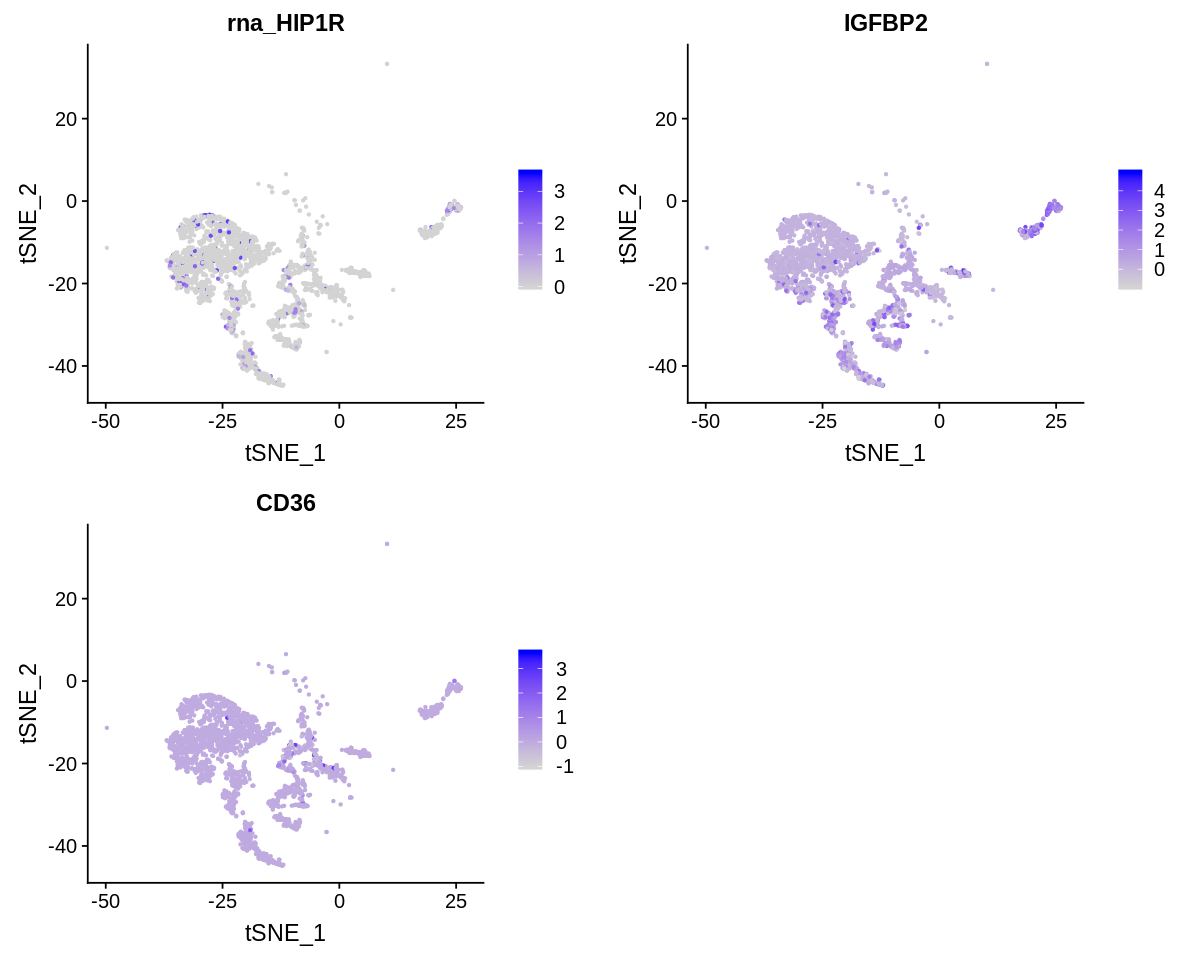

In [94]:
FeaturePlot(object = stomach, features = c("HIP1R","IGFBP2",'PTHLP','GHBP','VEGF','CD36'))

[1] "3 = foveolar cell?"
[1] "7 = metaplasia?"
[1] "9 = chief cell?"
[1] "13 = parietal cell"


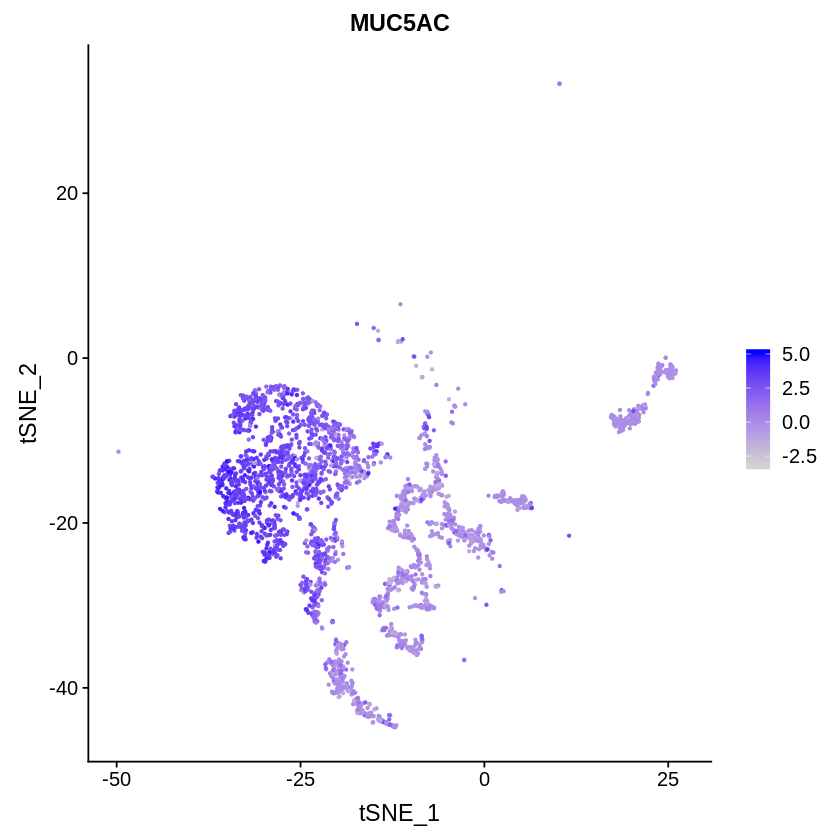

In [11]:
print('3 = foveolar cell?')
print('7 = metaplasia?')
print('9 = chief cell?')
print('13 = parietal cell')
p3 <- FeaturePlot(object = stomach, features = 'MUC5AC',)
plot(p3)

[1] "3 = foveolar cell?"
[1] "7 = metaplasia?"
[1] "9 = chief cell?"
[1] "13 = parietal cell"


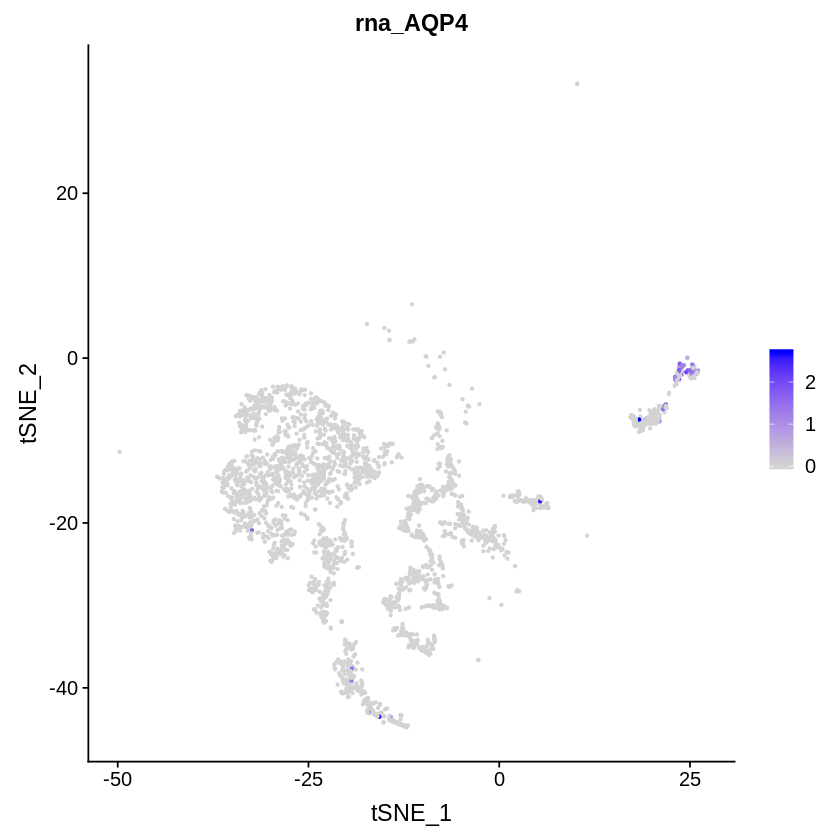

In [26]:
print('3 = foveolar cell?')
print('7 = metaplasia?')
print('9 = chief cell?')
print('13 = parietal cell')
FeaturePlot(object = stomach, features = 'rna_AQP4')

[1] "3 = foveolar cell?"
[1] "7 = metaplasia?"
[1] "9 = chief cell?"
[1] "13 = parietal cell"


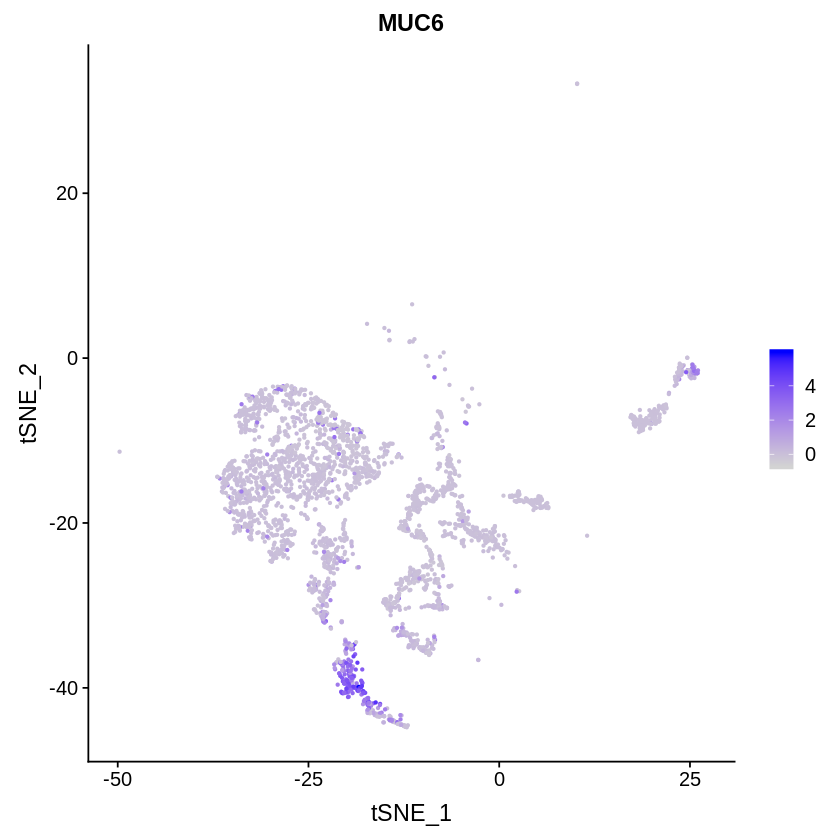

In [13]:
print('3 = foveolar cell?')
print('7 = metaplasia?')
print('9 = chief cell?')
print('13 = parietal cell')
FeaturePlot(object = stomach, features = 'MUC6')

In [16]:
print('3 = foveolar cell?')
print('7 = metaplasia?')
print('9 = chief cell?')
print('13 = parietal cell')
FeaturePlot(object = stomach, features = 'Bhlha15')

[1] "3 = foveolar cell?"
[1] "7 = metaplasia?"
[1] "9 = chief cell?"
[1] "13 = parietal cell"


Warning message in FetchData(object = object, vars = c(dims, features), cells = cells):
“The following requested variables were not found: Bhlha15”

ERROR: Error in `[.data.frame`(data, , feature): undefined columns selected


[1] "3 = foveolar cell?"
[1] "7 = metaplasia?"
[1] "9 = chief cell?"
[1] "13 = parietal cell"


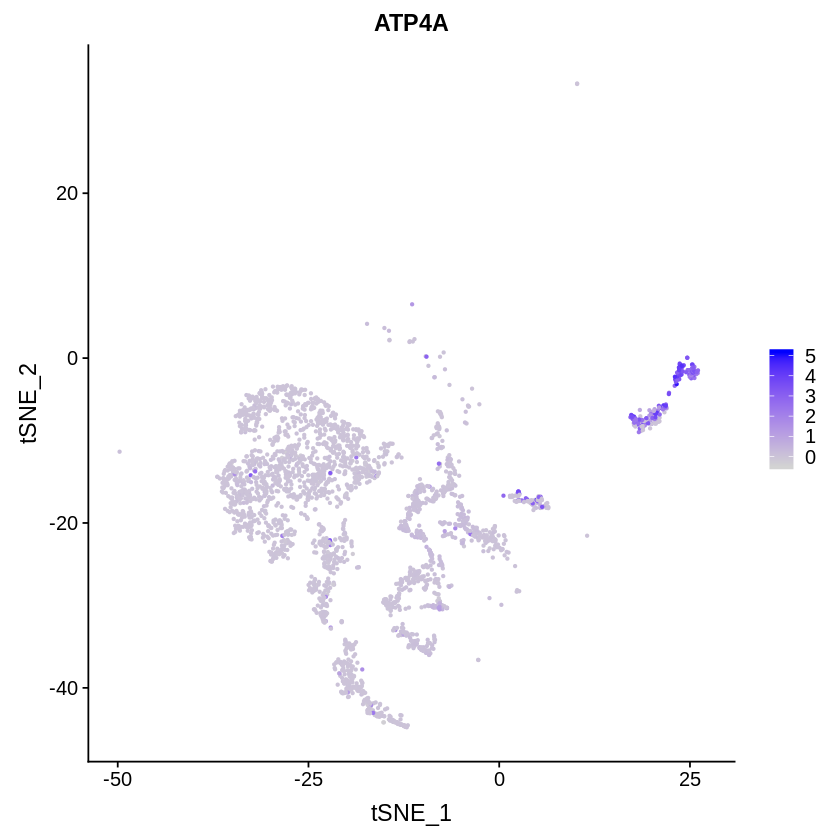

In [17]:
print('3 = foveolar cell?')
print('7 = metaplasia?')
print('9 = chief cell?')
print('13 = parietal cell')
FeaturePlot(object = stomach, features = 'ATP4A')

[1] "3 = foveolar cell?"
[1] "7 = metaplasia?"
[1] "9 = chief cell?"
[1] "13 = parietal cell"


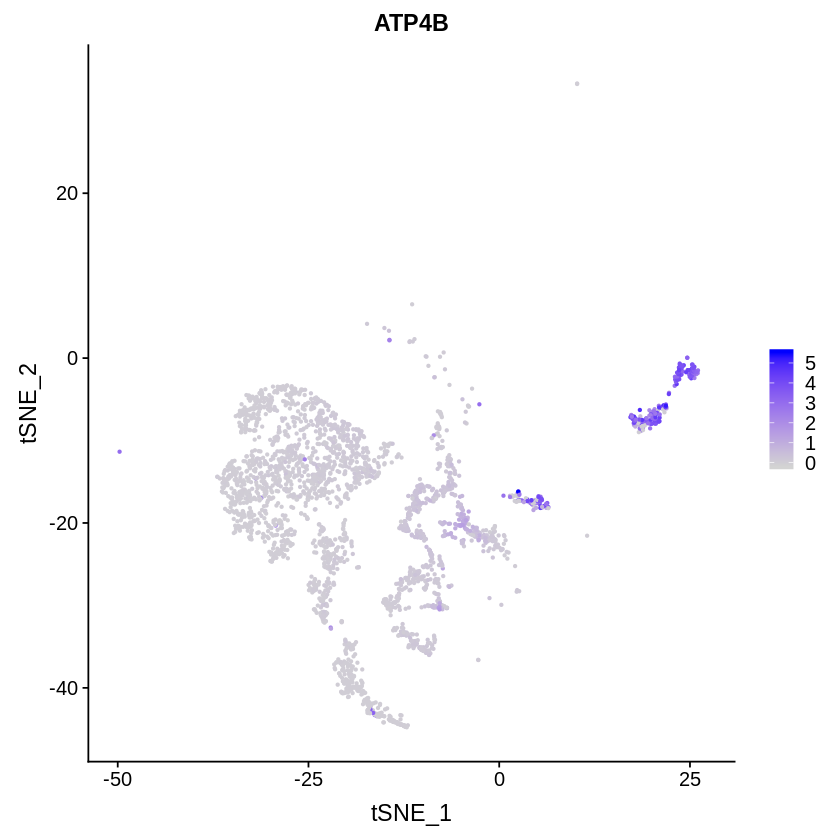

In [18]:
print('3 = foveolar cell?')
print('7 = metaplasia?')
print('9 = chief cell?')
print('13 = parietal cell')
FeaturePlot(object = stomach, features = 'ATP4B')

In [22]:
print('3 = foveolar cell?')
print('7 = metaplasia?')
print('9 = chief cell?')
print('13 = parietal cell')
FeaturePlot(object = stomach, features = 'ATP12A')

[1] "3 = foveolar cell?"
[1] "7 = metaplasia?"
[1] "9 = chief cell?"
[1] "13 = parietal cell"


Warning message in FetchData(object = object, vars = c(dims, features), cells = cells):
“The following requested variables were not found: ATP12A”

ERROR: Error in `[.data.frame`(data, , feature): undefined columns selected


[1] "3 = foveolar cell?"
[1] "7 = metaplasia?"
[1] "9 = chief cell?"
[1] "13 = parietal cell"


Warning message:
“Could not find CDH17 in the default search locations, found in RNA assay instead”Warning message:
“Could not find CDX2 in the default search locations, found in RNA assay instead”Warning message:
“Could not find VIL1 in the default search locations, found in RNA assay instead”Warning message:
“Could not find MUC2 in the default search locations, found in RNA assay instead”

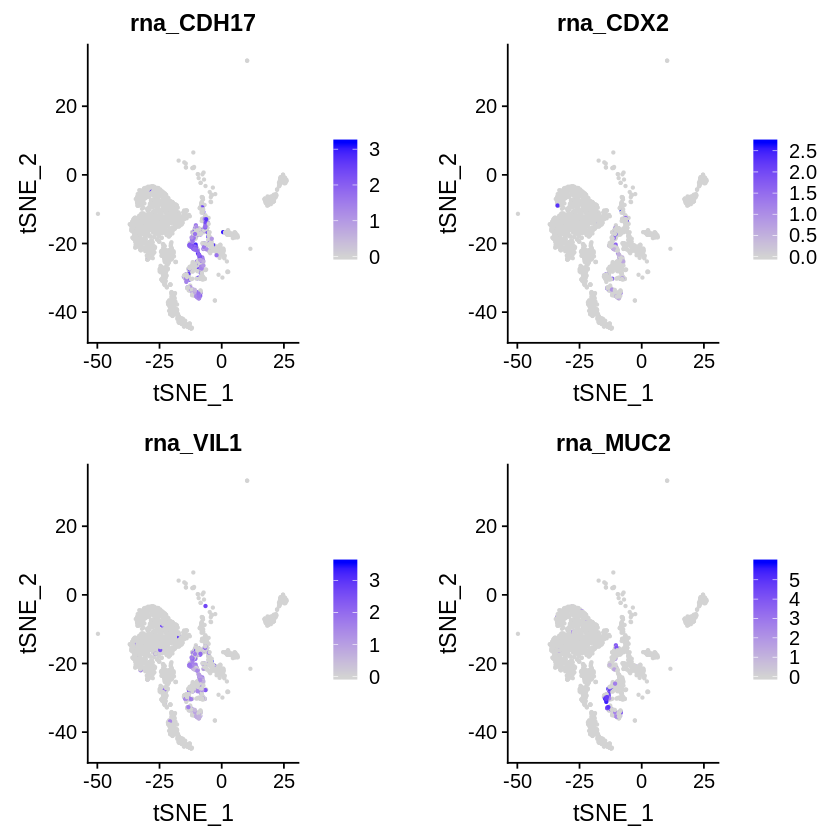

In [36]:
print('3 = foveolar cell?')
print('7 = metaplasia?')
print('9 = chief cell?')
print('13 = parietal cell')
FeaturePlot(object = stomach, features = c("CDH17","CDX2","VIL1","MUC2"))

[1] "3 = foveolar cell?"
[1] "7 = metaplasia?"
[1] "9 = chief cell?"
[1] "13 = parietal cell"


Warning message in DoHeatmap(object = stomach, features = c("MUC5AC", "RNA_AQP4", :
“The following features were omitted as they were not found in the scale.data slot for the integrated assay: VIL1, rna_CDX2, RNA_AQP4”

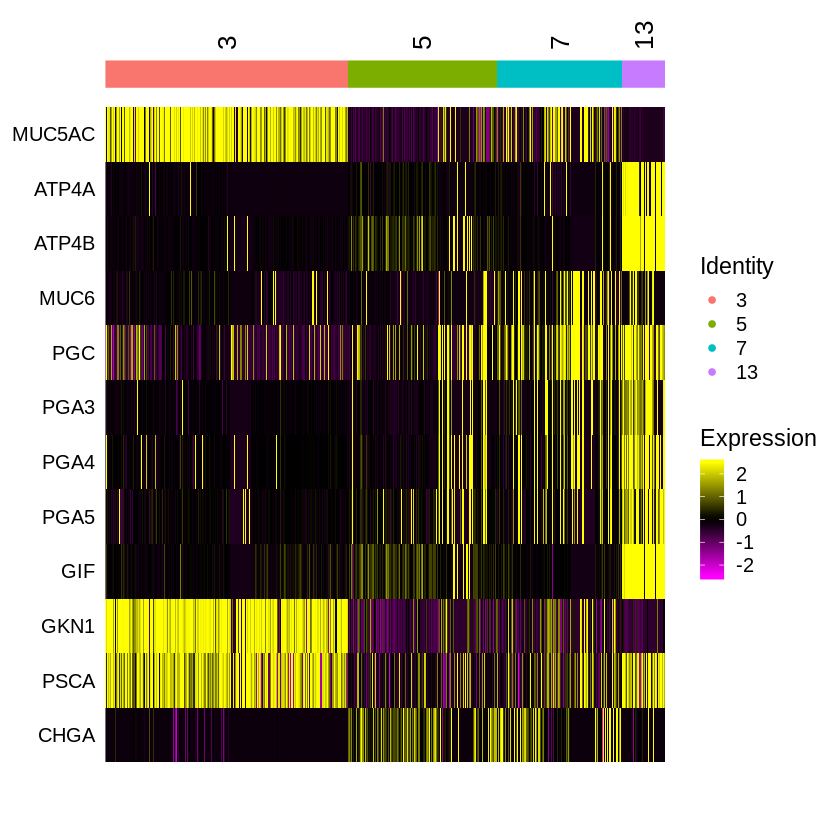

In [34]:
print('3 = foveolar cell?')
print('7 = metaplasia?')
print('9 = chief cell?')
print('13 = parietal cell')
DoHeatmap(object = stomach, features = c('MUC5AC', 'RNA_AQP4','ATP4A','ATP4B','MUC6','PGC','PGA3',"PGA4","PGA5",
                                        "GIF","GKN1", "PSCA",'rna_CDX2','VIL1','CHGA'), angle='90')

In [44]:
save(stomach, file="stomach.Rdata") 